In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import math
import seaborn as sns
import cv2

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # K neighbors classification model
from sklearn.svm import SVC # Support Vector Classifier model
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier model
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier model
from sklearn.metrics import accuracy_score # For checking the accuracy of the model

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
filename='Churn_Modelling.csv';
data=pd.read_csv(filename)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
print(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [8]:
data["BinaryGender"]=[1 if i=='Female' else 0 for i in data['Gender']]
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BinaryGender
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1


In [9]:
print(data['Geography'].value_counts(dropna =False))

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [10]:
data["BinaryGeo"]=[0 if i=='France' else 1 if i=='Germany' else 2 for i in data['Geography']]

In [11]:
data=data.drop(["Gender","Geography"],axis=1)

In [12]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BinaryGender,BinaryGeo
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,2
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0


In [13]:
print('France')
print(data.Exited[data.BinaryGeo==0].value_counts(dropna =False))
print('Germany')
print(data.Exited[data.BinaryGeo==1].value_counts(dropna =False))
print('Spain')
print(data.Exited[data.BinaryGeo==2].value_counts(dropna =False))


France
0    4204
1     810
Name: Exited, dtype: int64
Germany
0    1695
1     814
Name: Exited, dtype: int64
Spain
0    2064
1     413
Name: Exited, dtype: int64


In [14]:
data.corr()>0

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BinaryGender,BinaryGeo
RowNumber,True,True,True,True,False,False,True,True,True,False,False,False,False
CustomerId,True,True,True,True,False,False,True,False,True,True,False,True,True
CreditScore,True,True,True,False,True,True,True,False,True,False,False,True,True
Age,True,True,False,True,False,True,False,False,True,False,True,True,True
Tenure,False,False,True,False,True,False,True,True,False,True,False,False,True
Balance,False,False,True,True,False,True,False,False,False,True,True,False,True
NumOfProducts,True,True,True,False,True,False,True,True,True,True,False,True,True
HasCrCard,True,False,False,False,True,False,True,True,False,False,False,False,False
IsActiveMember,True,True,True,True,False,False,True,False,True,False,False,False,True
EstimatedSalary,False,True,False,False,True,True,True,False,False,True,True,True,False


Exited has a positive correlation with Age, Balance, Estimated Salary, Gender and Geography

Finding categorical data except Gender and Geography

In [15]:
for col in data.columns:
    if data[col].dtypes=='object':
        unique_values=len(data[col].unique())
        print(col,unique_values)

Surname 2932


In [16]:
data=data.drop(["Surname"],axis=1)

In [17]:
data['BinaryGeo'].corr(data['BinaryGender'])

-0.004718525886495531

In [18]:
visualization_1 = data.pivot_table("Exited", index="BinaryGender", columns="BinaryGeo")
visualization_1

BinaryGeo,0,1,2
BinaryGender,,,
0,0.127134,0.278116,0.131124
1,0.203450,0.375524,0.212121


Analysis: Women are more prone to exit and People from Germany are in general more to exit, Both are categorical. 

Analysing Numerical Data

Not Dropping Categorical Data and RowNumber and CustomerId 

In [19]:
data=data.drop(["RowNumber","CustomerId"],axis=1)

In [20]:
data.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BinaryGender,BinaryGeo
0,619,42,2,0.0,1,1,1,101348.88,1,1,0


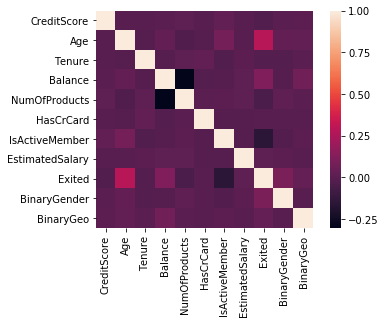

In [21]:
correlation =data.corr()
sns.heatmap(correlation.T, square=True, annot=False, fmt="d", cbar=True)

It shows Age,Gender,and Balance are important features in predicting, however other are more so equally correlated and hence we will consider them as well.

Is activemember is least correlated

In [22]:
target=data['Exited']

In [23]:
data=data.drop(["Exited"],axis=1)

In [24]:
 dataTrain, dataTest,targetTrain,targetTest= train_test_split(data,target,test_size=0.4, random_state=0)

In [25]:
y_pred = KNeighborsClassifier().fit(dataTrain, targetTrain).predict(dataTest)
accuracy = accuracy_score(y_pred, targetTest)*100
print("KNeighborsClassifier :", accuracy, "%")

KNeighborsClassifier : 75.625 %


In [26]:
y_pred = SVC().fit(dataTrain, targetTrain).predict(dataTest)
accuracy = accuracy_score(y_pred, targetTest)*100
print("SVC:", accuracy, "%")

C:\Users\srishti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC: 79.3 %


In [27]:
y_pred = DecisionTreeClassifier().fit(dataTrain, targetTrain).predict(dataTest)
accuracy = accuracy_score(y_pred, targetTest)*100
print("DecisionTreeClassifier :", accuracy, "%")

DecisionTreeClassifier : 78.0 %


In [28]:
y_pred = RandomForestClassifier(n_estimators=5, random_state=0).fit(dataTrain, targetTrain).predict(dataTest)
accuracy = accuracy_score(y_pred, targetTest)*100
print("RandomForestClassifier :", accuracy, "%")

RandomForestClassifier : 82.85 %


In [29]:
y_pred = LogisticRegression().fit(dataTrain, targetTrain).predict(dataTest)
accuracy = accuracy_score(y_pred, targetTest)*100
print("Logisticregression:", accuracy, "%")

Logisticregression: 78.175 %


C:\Users\srishti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
